MiniSEED: 220 Samples @ 20.0 Hz
WAV:      485100 Samples @ 44100 Hz
         network: GE
         station: KBU
        location: 
         channel: BHZ
       starttime: 2025-04-23T06:03:09.845000Z
         endtime: 2025-04-23T06:03:20.795000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 220
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 4096})


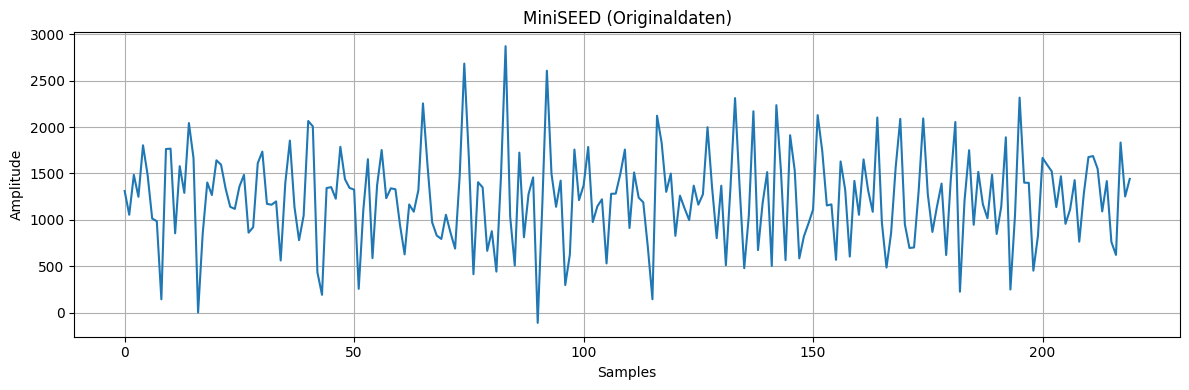

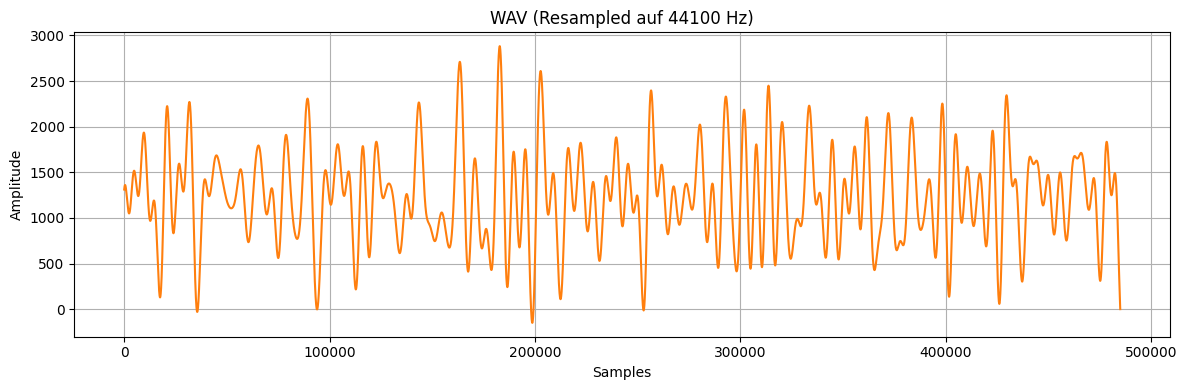

In [54]:
from obspy import read
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import resampy
from scipy.signal import resample_poly

# MiniSEED laden
stream = read("GE_KBU__BHZ_00002_20250423_060326.mseed")
trace = stream[0]
mseed_data = trace.data.astype(np.float32)
fs_in = trace.stats.sampling_rate

print(f"MiniSEED: {len(mseed_data)} Samples @ {fs_in} Hz")

# WAV erzeugen mit Resampling
target_fs = 44100
#wav_data = resampy.resample(mseed_data, fs_in, target_fs)
wav_data = resample_poly(mseed_data, up=target_fs, down=int(fs_in))
#wav_data = resampy.resample(mseed_data, fs_in, target_fs, pad=False)
sf.write("vergleich.wav", wav_data, samplerate=target_fs, subtype="FLOAT")




#sf.write("vergleich.wav", mseed_data, samplerate=int(fs_in), subtype="FLOAT")




# WAV wieder einlesen
wav_data_read, fs_read = sf.read("vergleich.wav", dtype='float32')
print(f"WAV:      {len(wav_data_read)} Samples @ {fs_read} Hz")

# Zeitachsen
#t_mseed = np.arange(len(mseed_data)) / fs_in
#t_wav = np.arange(len(wav_data_read)) / fs_read

# Samples
t_mseed = np.arange(len(mseed_data))
t_wav = np.arange(len(wav_data_read))

# print stats
print(trace.stats)

# Plot MiniSEED
plt.figure(figsize=(12, 4))
plt.plot(t_mseed, mseed_data, color='tab:blue')
plt.title("MiniSEED (Originaldaten)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot WAV
plt.figure(figsize=(12, 4))
plt.plot(t_wav, wav_data_read, color='tab:orange')
plt.title("WAV (Resampled auf 44100 Hz)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

